In [ ]:
!pip install -U pandasql


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=5b4065ee6ffe2a7bb2fefa27787c368a5b5ba8d9f98563e756a00fd68ba7d03b
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandasql import sqldf
import pandas as pd
from sklearn import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df_hosp_admissions = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/admissions.csv", nrows=5000)
# df_hosp_labevents = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/labevents.csv",nrows=1000)
# df_hosp_d_labitems = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/d_labitems.csv",nrows=1000)
df_hosp_microbiologyevents = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/microbiologyevents.csv",nrows=5000)
df_hosp_prescriptions = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/prescriptions.csv",nrows=5000)


In [ ]:
import pandas as pd
df_hosp_admissions = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/admissions.csv", nrows=10000)
df_hosp_labevents = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/labevents.csv",nrows=10000)
# df_hosp_d_labitems = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/d_labitems.csv",nrows=10000)
df_hosp_microbiologyevents = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/microbiologyevents.csv",nrows=10000)
df_hosp_prescriptions = pd.read_csv("gdrive/My Drive/Dataset/MIMIC/hosp/prescriptions.csv",nrows=10000)


In [ ]:
import pandas as pd
import sqlite3

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Convert the DataFrame to a SQL table
df_hosp_admissions.to_sql('df_hosp_admissions', conn, index=False)
# df_hosp_labevents.to_sql('df_hosp_labevents', conn, index=False)
# df_hosp_d_labitems.to_sql('df_hosp_d_labitems', conn, index=False)
df_hosp_microbiologyevents.to_sql('df_hosp_microbiologyevents', conn, index=False)
df_hosp_prescriptions.to_sql('df_hosp_prescriptions', conn, index=False)


query = '''
SELECT df_hosp_admissions.subject_id, df_hosp_admissions.hadm_id,
df_hosp_admissions.deathtime, df_hosp_admissions.admission_type,
df_hosp_admissions.admission_location, df_hosp_admissions.discharge_location,
df_hosp_admissions.insurance, df_hosp_admissions.marital_status,
df_hosp_microbiologyevents.spec_type_desc, df_hosp_microbiologyevents.test_name,
df_hosp_microbiologyevents.org_name, df_hosp_microbiologyevents.comments,


df_hosp_prescriptions.drug_type, df_hosp_prescriptions.drug,
df_hosp_prescriptions.formulary_drug_cd, df_hosp_prescriptions.prod_strength,
df_hosp_prescriptions.dose_val_rx, df_hosp_prescriptions.dose_unit_rx,
df_hosp_prescriptions.doses_per_24_hrs


FROM df_hosp_admissions
JOIN df_hosp_microbiologyevents ON df_hosp_admissions.subject_id = df_hosp_microbiologyevents.subject_id
JOIN df_hosp_prescriptions ON df_hosp_microbiologyevents.subject_id = df_hosp_prescriptions.subject_id

'''

# Execute the query and fetch the results into a pandas DataFrame
df = pd.read_sql_query(query, conn)

df


,subject_id,hadm_id,deathtime,admission_type,admission_location,discharge_location,insurance,marital_status,spec_type_desc,test_name,org_name,comments,drug_type,drug,formulary_drug_cd,prod_strength,dose_val_rx,dose_unit_rx,doses_per_24_hrs
0,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,BASE,0.9% Sodium Chloride,NS100CG,100 mL Bag,1,BAG,1.0
1,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,BASE,0.9% Sodium Chloride,NS100CG,100 mL Bag,1,BAG,1.0
2,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,MAIN,Acetaminophen,APAP500,500mg Tablet,500,mg,NaN
3,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,MAIN,Acetaminophen,APAP500,500mg Tablet,500,mg,NaN
4,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,MAIN,Albumin 25% (12.5g / 50mL),ALBU100,100 mL Bag,25,g,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179545,10003019,28836362,None,ELECTIVE,PHYSICIAN REFERRAL,HOME,Medicare,MARRIED,URINE,URINE CULTURE,None,NO GROWTH.,MAIN,VinBLAStine (Velban),VINB10I,1mg/mL-10mL,10.5,mg,1.0
2179546,10003019,28836362,None,ELECTIVE,PHYSICIAN REFERRAL,HOME,Medicare,MARRIED,URINE,URINE CULTURE,None,NO GROWTH.,MAIN,VinBLAStine (Velban),VINB10I,1mg/mL-10mL,10.5,mg,1.0
2179547,10003019,28836362,None,ELECTIVE,PHYSICIAN REFERRAL,HOME,Medicare,MARRIED,URINE,URINE CULTURE,None,NO GROWTH.,MAIN,Vitamin D,ERGO50,"50,000 Unit Capsule","50,000",UNIT,0.0
2179548,10003019,28836362,None,ELECTIVE,PHYSICIAN REFERRAL,HOME,Medicare,MARRIED,URINE,URINE CULTURE,None,NO GROWTH.,MAIN,Vitamin D,ERGO50,"50,000 Unit Capsule","50,000",UNIT,0.0


In [ ]:
# df.to_csv('/content/gdrive/My Drive/Dataset/Mortality_Prediction.csv', index=False)

In [ ]:
# df = pd.read_csv("gdrive/My Drive/Mortality prediction dataset/Mortality_Prediction.csv")


<ipython-input-5-ce3e72d2dec4>:1: DtypeWarning: Columns (2,5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("gdrive/My Drive/Mortality prediction dataset/Mortality_Prediction.csv")


In [ ]:
df

,subject_id,hadm_id,deathtime,admission_type,admission_location,discharge_location,insurance,marital_status,spec_type_desc,test_name,org_name,comments,drug_type,drug,formulary_drug_cd,prod_strength,dose_val_rx,dose_unit_rx,doses_per_24_hrs
0,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,BASE,0.9% Sodium Chloride,NS100CG,100 mL Bag,1,BAG,1.0
1,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,BASE,0.9% Sodium Chloride,NS100CG,100 mL Bag,1,BAG,1.0
2,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,MAIN,Acetaminophen,APAP500,500mg Tablet,500,mg,NaN
3,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,MAIN,Acetaminophen,APAP500,500mg Tablet,500,mg,NaN
4,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,MAIN,Albumin 25% (12.5g / 50mL),ALBU100,100 mL Bag,25,g,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166444,10001217,27703517,None,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,None,NO GROWTH.,MAIN,Sodium Chloride 0.9% Flush,NACLFLUSH,10 mL Syringe,3,mL,3.0
166445,10001217,27703517,None,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,None,NO GROWTH.,MAIN,Vancomycin,VANC1F,1g Frozen Bag,1000,mg,3.0
166446,10001217,27703517,None,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,None,NO GROWTH.,MAIN,Vancomycin,VANC500I,500mg Vial,1250,mg,2.0
166447,10001217,27703517,None,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,None,NO GROWTH.,MAIN,Vancomycin,VANC500I,500mg Vial,1250,mg,2.0


In [ ]:
df['deathtime_value'] = df['deathtime'].notnull().astype(int)


In [ ]:
df

,subject_id,hadm_id,deathtime,admission_type,admission_location,discharge_location,insurance,marital_status,spec_type_desc,test_name,org_name,comments,drug_type,drug,formulary_drug_cd,prod_strength,dose_val_rx,dose_unit_rx,doses_per_24_hrs,deathtime_value
0,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,BASE,0.9% Sodium Chloride,NS100CG,100 mL Bag,1,BAG,1.0,0
1,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,BASE,0.9% Sodium Chloride,NS100CG,100 mL Bag,1,BAG,1.0,0
2,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,MAIN,Acetaminophen,APAP500,500mg Tablet,500,mg,NaN,0
3,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,MAIN,Acetaminophen,APAP500,500mg Tablet,500,mg,NaN,0
4,10000032,22595853,None,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",None,NO GROWTH.,MAIN,Albumin 25% (12.5g / 50mL),ALBU100,100 mL Bag,25,g,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166444,10001217,27703517,None,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,None,NO GROWTH.,MAIN,Sodium Chloride 0.9% Flush,NACLFLUSH,10 mL Syringe,3,mL,3.0,0
166445,10001217,27703517,None,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,None,NO GROWTH.,MAIN,Vancomycin,VANC1F,1g Frozen Bag,1000,mg,3.0,0
166446,10001217,27703517,None,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,None,NO GROWTH.,MAIN,Vancomycin,VANC500I,500mg Vial,1250,mg,2.0,0
166447,10001217,27703517,None,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,None,NO GROWTH.,MAIN,Vancomycin,VANC500I,500mg Vial,1250,mg,2.0,0


In [ ]:
df.fillna(0, inplace=True)


In [ ]:
df

,subject_id,hadm_id,deathtime,admission_type,admission_location,discharge_location,insurance,marital_status,spec_type_desc,test_name,org_name,comments,drug_type,drug,formulary_drug_cd,prod_strength,dose_val_rx,dose_unit_rx,doses_per_24_hrs,deathtime_value
0,10000032,22595853,0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",0,NO GROWTH.,BASE,0.9% Sodium Chloride,NS100CG,100 mL Bag,1,BAG,1.0,0
1,10000032,22595853,0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",0,NO GROWTH.,BASE,0.9% Sodium Chloride,NS100CG,100 mL Bag,1,BAG,1.0,0
2,10000032,22595853,0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",0,NO GROWTH.,MAIN,Acetaminophen,APAP500,500mg Tablet,500,mg,0.0,0
3,10000032,22595853,0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",0,NO GROWTH.,MAIN,Acetaminophen,APAP500,500mg Tablet,500,mg,0.0,0
4,10000032,22595853,0,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",0,NO GROWTH.,MAIN,Albumin 25% (12.5g / 50mL),ALBU100,100 mL Bag,25,g,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166444,10001217,27703517,0,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,0,NO GROWTH.,MAIN,Sodium Chloride 0.9% Flush,NACLFLUSH,10 mL Syringe,3,mL,3.0,0
166445,10001217,27703517,0,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,0,NO GROWTH.,MAIN,Vancomycin,VANC1F,1g Frozen Bag,1000,mg,3.0,0
166446,10001217,27703517,0,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,0,NO GROWTH.,MAIN,Vancomycin,VANC500I,500mg Vial,1250,mg,2.0,0
166447,10001217,27703517,0,DIRECT EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,MARRIED,SWAB,WOUND CULTURE,0,NO GROWTH.,MAIN,Vancomycin,VANC500I,500mg Vial,1250,mg,2.0,0


In [ ]:
count = (df['deathtime_value'] == 1).sum()
print(count)

28836


In [ ]:
count = (df['deathtime_value'] == 0).sum()
print(count)

2150714


In [ ]:
import pandas as pd

# Assuming 'df' is the existing DataFrame with a column named 'value'

# Filter rows with value equal to '0'
zeros = df[df['deathtime_value'] == 0].sample(n=1500, random_state=1)

# Filter rows with value equal to '1'
ones = df[df['deathtime_value'] == 1].sample(n=1500, random_state=1)

# Concatenate the filtered rows
df = pd.concat([zeros, ones])

# Reset the index of the new DataFrame
df = df.reset_index(drop=True)

# Print the new DataFrame
df


,subject_id,hadm_id,deathtime,admission_type,admission_location,discharge_location,insurance,marital_status,spec_type_desc,test_name,org_name,comments,drug_type,drug,formulary_drug_cd,prod_strength,dose_val_rx,dose_unit_rx,doses_per_24_hrs,deathtime_value
0,10002428,28662225,0,EW EMER.,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,WIDOWED,BLOOD CULTURE,"Blood Culture, Routine",0,NO GROWTH.,MAIN,Azithromycin,ZITHR250,250 mg Tablet,250,mg,1.0,0
1,10001884,24325811,0,EU OBSERVATION,EMERGENCY ROOM,0,Medicare,MARRIED,BLOOD CULTURE,ANAEROBIC BOTTLE,0,NO GROWTH.,MAIN,LORazepam,LORA5,0.5mg Tablet,0.5,mg,0.0,0
2,10001884,26202981,0,EW EMER.,EMERGENCY ROOM,HOME,Medicare,MARRIED,SPUTUM,RESPIRATORY CULTURE,0,NO GROWTH.,MAIN,Montelukast Sodium,MONT10,10mg Tablet,10,mg,1.0,0
3,10001884,28669374,0,EU OBSERVATION,EMERGENCY ROOM,0,Medicare,MARRIED,MRSA SCREEN,MRSA SCREEN,0,No MRSA isolated.,MAIN,Senna,SENN187,8.6 mg Tablet,8.6,mg,0.0,0
4,10003019,20030125,0,EW EMER.,EMERGENCY ROOM,HOME,Medicare,MARRIED,STOOL,C. difficile PCR,CLOSTRIDIUM DIFFICILE,___,BASE,SW,KCLBASE,100ml Bag,600,mL,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10002155,20345487,2131-03-10 21:53:00,EW EMER.,EMERGENCY ROOM,DIED,Other,MARRIED,BLOOD CULTURE,"Blood Culture, Routine",0,NO GROWTH.,MAIN,CeftriaXONE,CEFX1F,1g Frozen Bag,1,gm,1.0,1
2996,10001884,26184834,2131-01-20 05:15:00,OBSERVATION ADMIT,EMERGENCY ROOM,DIED,Medicare,MARRIED,SWAB,YEAST VAGINITIS CULTURE,0,NEGATIVE FOR YEAST.,MAIN,Lorazepam,LORA5,0.5mg Tablet,0.5,mg,0.0,1
2997,10001884,26184834,2131-01-20 05:15:00,OBSERVATION ADMIT,EMERGENCY ROOM,DIED,Medicare,MARRIED,BLOOD CULTURE,"Blood Culture, Routine",0,NO GROWTH.,MAIN,Fluticasone-Salmeterol Diskus (500/50),ADVA500/50,500/50mcg Diskus,1,INH,2.0,1
2998,10002155,20345487,2131-03-10 21:53:00,EW EMER.,EMERGENCY ROOM,DIED,Other,MARRIED,BLOOD CULTURE,"Blood Culture, Routine",0,NO GROWTH.,MAIN,traZODONE,TRAZ50,50mg Tablet,25,mg,1.0,1


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split

# SELECT df_icu_stays.subject_id, df_icu_stays.hadm_id, df_icu_stays.stay_id, df_icu_stays.first_careunit, df_icu_stays.last_careunit,
# df_icu_stays.intime, df_icu_stays.outtime, df_icu_stays.los, df_admission.deathtime

df['admission_type'] = df['admission_type'].astype(str)
df['admission_location'] = df['admission_location'].astype(str)
df['discharge_location'] = df['discharge_location'].astype(str)
df['insurance'] = df['insurance'].astype(str)
df['marital_status'] = df['marital_status'].astype(str)
df['spec_type_desc'] = df['spec_type_desc'].astype(str)
df['test_name'] = df['test_name'].astype(str)
df['comments'] = df['comments'].astype(str)
df['drug_type'] = df['drug_type'].astype(str)
df['drug'] = df['drug'].astype(str)
df['formulary_drug_cd'] = df['formulary_drug_cd'].astype(str)
df['prod_strength'] = df['prod_strength'].astype(str)


texts = df['admission_type'] + " " + df['admission_location'] + " " + df['discharge_location'] + " " + df['insurance'] + " " + df['marital_status'] + " " + df['spec_type_desc'] + " " + df['test_name'] + " " + df['comments'] + " " + df['drug_type'] + " " + df['drug'] + " " + df['formulary_drug_cd'] + " " + df['prod_strength']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
max_len = max([len(seq) for seq in X])
X = pad_sequences(X, maxlen=max_len)
# X = np.array(padded_sequences)
# y = np.asarray(df['value'])
y = df['deathtime_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
data = {}
data["X_train"] = X_train
data["X_test"]= X_test
data["X_val"] = X_val
data["y_train"] = y_train
data["y_test"] = y_test
data["y_val"] = y_val
data["tokenizer"] = tokenizer


vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100  # Change this value based on your requirements
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len)




In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(128))  # Adjust the LSTM units as needed
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, change activation for multi-class
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history_val = model.fit(data['X_train'], data['y_train'], validation_data=(data['X_val'], data['y_val']), batch_size=32, epochs=10, verbose=2)


Epoch 1/10
57/57 - 18s - loss: 0.4924 - accuracy: 0.8089 - val_loss: 0.1455 - val_accuracy: 0.9867 - 18s/epoch - 322ms/step
Epoch 2/10
57/57 - 6s - loss: 0.0321 - accuracy: 0.9939 - val_loss: 0.0019 - val_accuracy: 1.0000 - 6s/epoch - 114ms/step
Epoch 3/10
57/57 - 4s - loss: 0.3451 - accuracy: 0.9239 - val_loss: 0.8479 - val_accuracy: 0.5117 - 4s/epoch - 75ms/step
Epoch 4/10
57/57 - 3s - loss: 0.2964 - accuracy: 0.8667 - val_loss: 0.0953 - val_accuracy: 1.0000 - 3s/epoch - 60ms/step
Epoch 5/10
57/57 - 3s - loss: 0.0278 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000 - 3s/epoch - 51ms/step
Epoch 6/10
57/57 - 1s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - 1s/epoch - 26ms/step
Epoch 7/10
57/57 - 1s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000 - 1s/epoch - 20ms/step
Epoch 8/10
57/57 - 1s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000 - 1s/epoch - 20ms/step
Epoch 9/10
57/57 - 2s - loss

In [ ]:
data['X_test']

array([[  0,   0,   0, ...,  29,  21,  79],
       [  0,   0,   0, ..., 225,  59,  17],
       [  0,   0,   0, ..., 183, 302,  78],
       ...,
       [  0,   0,   0, ..., 722, 438,  33],
       [  0,   0,   0, ..., 392,  80,  17],
       [  0,   0,   0, ..., 598, 226,  92]], dtype=int32)

In [ ]:
Y_pred = model.predict(data['X_test'])


19/19 [==============================] - 0s 4ms/step


In [ ]:
Y_pred

array([[9.9994612e-01],
       [1.5210160e-03],
       [9.9994314e-01],
       [2.9427358e-03],
       [9.9994862e-01],
       [1.4954197e-03],
       [1.3757043e-03],
       [9.9995100e-01],
       [1.0204386e-03],
       [9.9988687e-01],
       [9.9995017e-01],
       [1.2943101e-03],
       [1.4872361e-03],
       [9.9996054e-01],
       [9.9993217e-01],
       [1.3670472e-03],
       [4.8854353e-04],
       [2.7158775e-03],
       [9.9994862e-01],
       [9.9994075e-01],
       [8.2128181e-04],
       [6.9257861e-04],
       [5.2739953e-04],
       [9.9986875e-01],
       [2.1763160e-03],
       [9.9979657e-01],
       [9.9995995e-01],
       [1.3784210e-03],
       [9.9256448e-04],
       [2.4658896e-03],
       [5.0207198e-04],
       [9.9993467e-01],
       [1.3531586e-03],
       [9.9991620e-01],
       [5.1093369e-04],
       [3.1167683e-03],
       [9.9994409e-01],
       [1.0426572e-03],
       [1.3807570e-03],
       [1.0068297e-03],
       [1.9029505e-03],
       [1.383403

In [ ]:
threshold = 0.5
Y_pred = (Y_pred > threshold).astype(int)


In [ ]:
Y_pred

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_true' contains the true binary labels and 'predictions' contains the predicted labels

# Calculate precision
precision = precision_score(data['y_test'], Y_pred)

# Calculate recall
recall = recall_score(data['y_test'], Y_pred)

# Calculate F1 score
f1 = f1_score(data['y_test'], Y_pred)

# Calculate confusion matrix
confusion_mat = confusion_matrix(data['y_test'], Y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)


Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[313   0]
 [  0 287]]


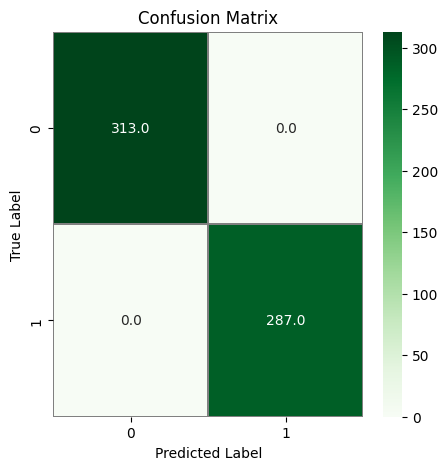

f1-score:
1.0
precision_score:
1.0
recall_score:
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       287

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def confussion_mat(y_test, Y_pred):
    confusion_mtx = confusion_matrix(y_test, Y_pred)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

confussion_mat(data['y_test'], Y_pred)

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("f1-score:")
print(f1_score(data['y_test'], Y_pred, average="macro"))
print("precision_score:")
print(precision_score(data['y_test'], Y_pred, average="macro"))
print("recall_score:")
print(recall_score(data['y_test'], Y_pred, average="macro"))

# print("F1-score: {:.1%}".format(f1_score(Y_true, Y_pred_classes)))
print(classification_report(data['y_test'], Y_pred))